### Teste técnico da área de Análise de Dados

Mais detalhes vide README.md

**Etapas da análise:**

1. Importação de bibliotecas
2. Leitura e pré-processamento dos dados
3. Análise exploratória geral
4. Métricas de Engajamento
5. Métricas de Desempenho
6. Padrões de Uso
7. Segmentações
8. Recomendações baseadas nos dados



In [29]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:.2f}'.format

In [30]:
# Leitura do arquivo CSV
df_raw = pd.read_csv("Dados/Dados.csv", encoding='latin1', sep=';')
df_raw.head()


,ID,Data,Hora,Região,Estudante,Curso,Feature,Nota
0,1,06/08/2023,08:28:21,Sudeste,Cintia Nogueira,Literatura,Simulados,"5,9"
1,2,05/08/2023,05:51:54,Sudeste,Caio Damasco,Física,Ebooks,X
2,3,07/08/2023,10:46:16,Sudeste,Caio Damasco,Física,Simulados,"2,45"
3,4,14/08/2023,22:44:25,Norte,Yuri Kepler,Física,Aulas Online,X
4,5,08/08/2023,00:41:16,Norte,Daniel Dalembert,Literatura,Aulas Online,X


In [31]:
# Informações sobre o DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         200 non-null    int64 
 1   Data       200 non-null    object
 2   Hora       200 non-null    object
 3   Região     200 non-null    object
 4   Estudante  200 non-null    object
 5   Curso      200 non-null    object
 6   Feature    200 non-null    object
 7   Nota       200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


In [32]:
df_raw.isnull().sum()

ID           0
Data         0
Hora         0
Região       0
Estudante    0
Curso        0
Feature      0
Nota         0
dtype: int64

In [33]:
# Fazendo uma copia do DataFrame
df = df_raw.copy()

# Substituindo vírgula por ponto e convertendo a coluna Nota
df["Nota"] = df["Nota"].str.replace(",", ".")
df["Nota"] = pd.to_numeric(df["Nota"], errors="coerce")

# Convertendo data e hora para um formato mais adequado
df["Data"] = pd.to_datetime(df["Data"], format="%d/%m/%Y")
df["Hora"] = pd.to_datetime(df["Hora"], format="%H:%M:%S").dt.time

# Criando novas colunas de dias da semana e hora do dia
df["Dia da Semana"] = df["Data"].dt.day_name()
df["Dia do Mês"] = df["Data"].dt.day
df["Hora do Dia"] = df["Hora"].apply(lambda x: x.hour)

# Verificando o resultado
df.head()


,ID,Data,Hora,Região,Estudante,Curso,Feature,Nota,Dia da Semana,Dia do Mês,Hora do Dia
0,1,2023-08-06,08:28:21,Sudeste,Cintia Nogueira,Literatura,Simulados,5.90,Sunday,6,8
1,2,2023-08-05,05:51:54,Sudeste,Caio Damasco,Física,Ebooks,NaN,Saturday,5,5
2,3,2023-08-07,10:46:16,Sudeste,Caio Damasco,Física,Simulados,2.45,Monday,7,10
3,4,2023-08-14,22:44:25,Norte,Yuri Kepler,Física,Aulas Online,NaN,Monday,14,22
4,5,2023-08-08,00:41:16,Norte,Daniel Dalembert,Literatura,Aulas Online,NaN,Tuesday,8,0


In [34]:
# Verificando dados estatísticos gerais do conjunto de dados
df.describe(include="all")

,ID,Data,Hora,Região,Estudante,Curso,Feature,Nota,Dia da Semana,Dia do Mês,Hora do Dia
count,200.00,200,200,200,200,200,200,93.00,200,200.00,200.00
unique,NaN,NaN,200,5,19,6,4,NaN,7,NaN,NaN
top,NaN,NaN,08:28:21,Norte,Yuri Kepler,Matemática,Aulas Online,NaN,Tuesday,NaN,NaN
freq,NaN,NaN,1,49,17,42,60,NaN,36,NaN,NaN
mean,100.50,2023-08-15 05:52:48,NaN,NaN,NaN,NaN,NaN,4.69,NaN,15.24,12.54
min,1.00,2023-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.15,NaN,1.00,0.00
25%,50.75,2023-08-07 00:00:00,NaN,NaN,NaN,NaN,NaN,2.07,NaN,7.00,7.00
50%,100.50,2023-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,5.03,NaN,15.00,13.00
75%,150.25,2023-08-23 00:00:00,NaN,NaN,NaN,NaN,NaN,6.78,NaN,23.00,19.00
max,200.00,2023-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,9.90,NaN,31.00,23.00


#### Início da análise em busca de KPIs e Métricas relevantes

In [35]:
data_inicial = df["Data"].min()
data_final = df["Data"].max()
display(data_inicial, data_final)

Timestamp('2023-08-01 00:00:00')

Timestamp('2023-08-31 00:00:00')

In [36]:
df["Estudante"].unique()

array(['Cintia Nogueira', 'Caio Damasco', 'Yuri Kepler',
       'Daniel Dalembert', 'Polyana Hermes', 'Romero Trajano', 'Hélio Jr',
       'Geovana Hiur', 'Ana Malu', 'Karol Alencar', 'Pedro Honório',
       'Júlio Godoy', 'Renan Oliveira', 'Brunno Paiva', 'Sávio Pedrosa',
       'Fernando Yuri', 'Kleiton Xavier', 'Lugano Diego', 'Mannu Cardoso'],
      dtype=object)

In [37]:
# Contagem de acessos por estudante
acessos_aluno = df["Estudante"].value_counts().reset_index()
acessos_aluno.columns = ["Estudante", "Total de Acessos"]
acessos_aluno.head()


,Estudante,Total de Acessos
0,Yuri Kepler,17
1,Polyana Hermes,16
2,Daniel Dalembert,16
3,Hélio Jr,15
4,Sávio Pedrosa,14


In [38]:
# Verificando a frequência média semanal com que cada aluno acessa o sistema
acessos_por_dia = df.groupby("Estudante")["Data"].nunique()
frequencia_semanal = acessos_por_dia / ((df["Data"].max() - df["Data"].min()).days / 7)
frequencia_semanal = frequencia_semanal.reset_index(name="Frequência média semanal")
frequencia_semanal.head()


,Estudante,Frequência média semanal
0,Ana Malu,2.33
1,Brunno Paiva,1.40
2,Caio Damasco,1.63
3,Cintia Nogueira,1.40
4,Daniel Dalembert,2.80


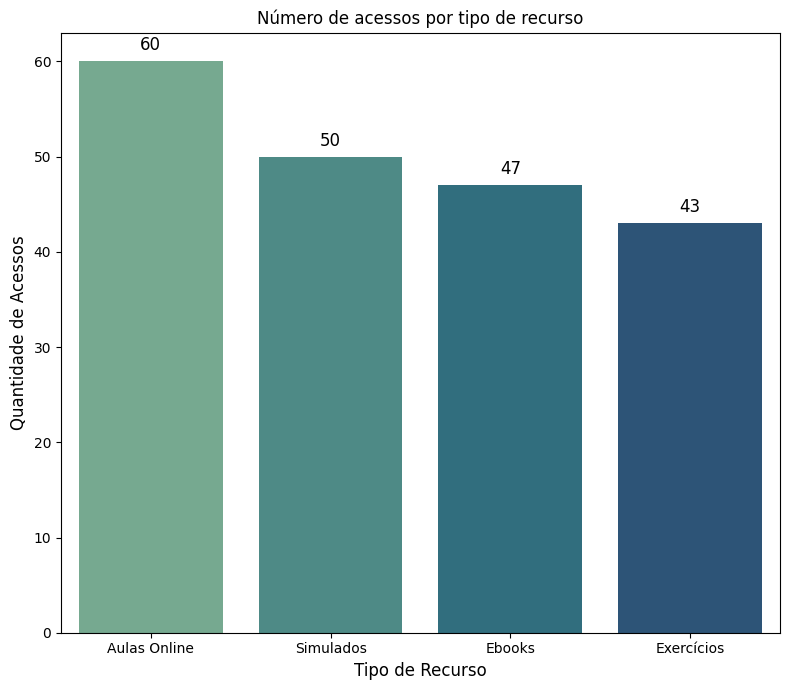

In [39]:
plt.figure(figsize=(8, 7))
ax = sns.countplot(data=df, x="Feature", order=df["Feature"].value_counts().index, palette="crest")
plt.title("Número de acessos por tipo de recurso", fontsize=12)
plt.xlabel("Tipo de Recurso", fontsize=12)
plt.ylabel("Quantidade de Acessos", fontsize=12)
plt.xticks(rotation=0, ha='center')

# Adicionando os valores no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=12, xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()



In [40]:
# Criando a tabela dinâmica de acessos por curso e por região
pivot = pd.pivot_table(df, index="Curso", columns="Região", values="Estudante", aggfunc="count", fill_value=0)

# Adicionando uma linha "Total" com a soma por coluna (ou seja, total por região)
pivot.loc["Total"] = pivot.sum()

# Exibindo a tabela
pivot


Região,Centro Oeste,Nordeste,Norte,Sudeste,Sul
Curso,,,,,
Ciências da Computação,2,5,11,6,7
Engenharia Civil,4,7,7,7,7
Física,5,4,9,13,9
História,6,2,4,8,5
Literatura,6,6,7,5,6
Matemática,6,10,11,7,8
Total,29,34,49,46,42


In [41]:
# Média de notas por curso, recurso e região
df_notas = df.dropna(subset=["Nota"])

media_curso = df_notas.groupby("Curso")["Nota"].mean().sort_values(ascending=False)
media_recurso = df_notas.groupby("Feature")["Nota"].mean().sort_values(ascending=False)
media_regiao = df_notas.groupby("Região")["Nota"].mean().sort_values(ascending=False)

#display("Média por Curso:")
display(media_curso)
#display("\nMédia por Recurso:")
display(media_recurso)
#display("\nMédia por Região:")
display(media_regiao)


Curso
Ciências da Computação   5.44
História                 5.08
Literatura               4.62
Física                   4.55
Engenharia Civil         4.47
Matemática               3.88
Name: Nota, dtype: float64

Feature
Simulados    4.72
Exercícios   4.65
Name: Nota, dtype: float64

Região
Sudeste        5.69
Norte          5.02
Centro Oeste   4.99
Nordeste       4.28
Sul            3.15
Name: Nota, dtype: float64

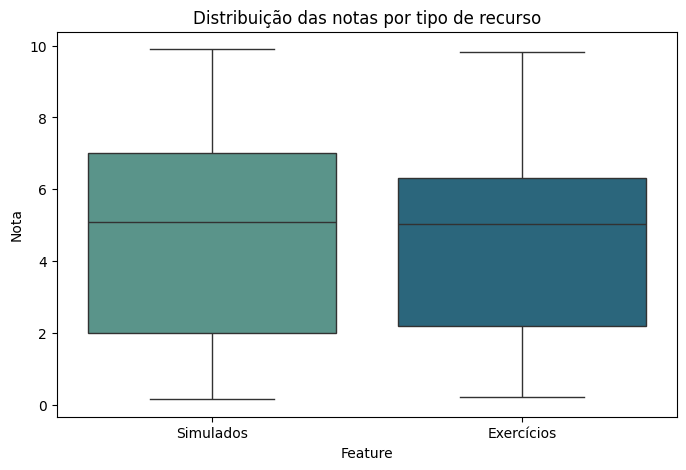

In [42]:
# Boxplot das notas por recurso
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_notas, x="Feature", y="Nota", palette="crest")
plt.title("Distribuição das notas por tipo de recurso")
plt.xticks(rotation=0)
plt.show()


Simulados:

Apresentam uma mediana mais alta em comparação aos demais recursos.

A caixa está mais concentrada em valores superiores, indicando que muitos alunos têm boas notas ao utilizar esse recurso.

Aulas Online:

A ausência de notas sugere que as aulas online não são utilizadas como critério de avaliação.

Exercícios:

Têm uma distribuição mais larga, o que indica variação maior no desempenho dos alunos.

Existem alguns outliers para baixo, sugerindo que alguns alunos encontram dificuldade com esse tipo de recurso.

Ebooks:

Em muitos casos, aparecem com nota nula ou ausência de nota (representado por ausência de boxplot).

Isso sugere que os ebooks são usados mais como recurso passivo, ao invés de recurso avaliativo.



In [43]:
# Porcentagem de interações sem nota
sem_nota = df["Nota"].isna().sum()
total = len(df)
percentual_sem_nota = (sem_nota / total) * 100

print(f"{percentual_sem_nota:.2f}% das interações não possuem nota (apenas acesso)")


53.50% das interações não possuem nota (apenas acesso)


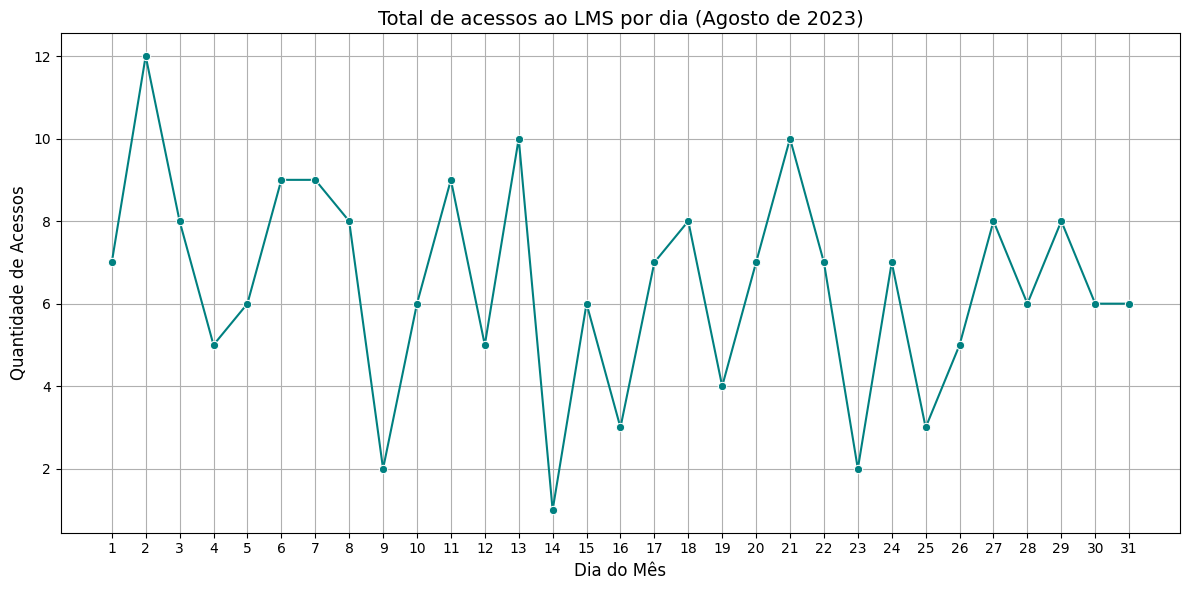

In [44]:
# Agrupando os dados por dia e contando os acessos
acessos_por_dia = df.groupby("Dia do Mês").size().reset_index(name="Total de Acessos")

# Plotando o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=acessos_por_dia, x="Dia do Mês", y="Total de Acessos", marker='o', color='teal')

# Formatação do gráfico
plt.title("Total de acessos ao LMS por dia (Agosto de 2023)", fontsize=14)
plt.xlabel("Dia do Mês", fontsize=12)
plt.ylabel("Quantidade de Acessos", fontsize=12)
plt.xticks(range(1, 32))
plt.grid(True)
plt.tight_layout()

plt.show()

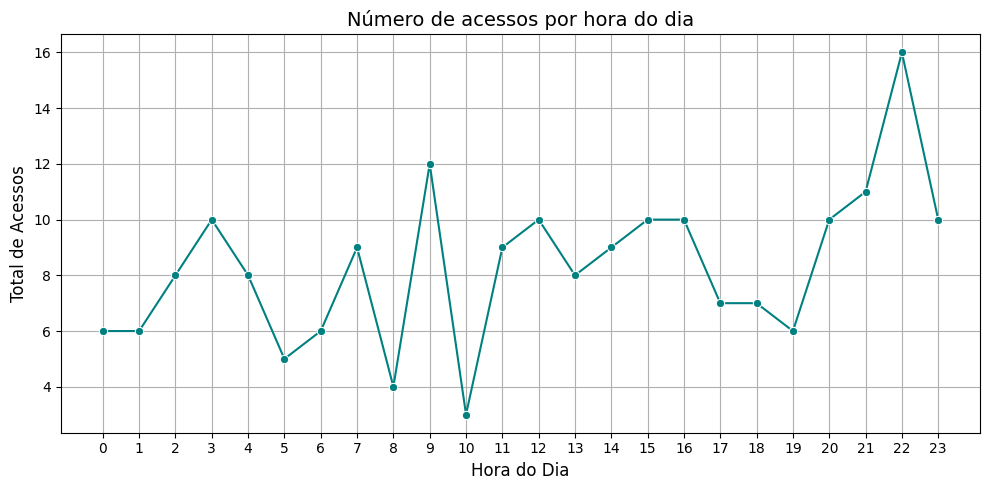

In [45]:
# Contagem de acessos por hora do dia (Horário de pico)
# Agrupando os acessos por hora do dia
acessos_por_hora = df.groupby("Hora do Dia").size().reset_index(name="Total de Acessos")

# Plotando o gráfico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(data=acessos_por_hora, x="Hora do Dia", y="Total de Acessos", marker='o', color='teal')
plt.title("Número de acessos por hora do dia", fontsize=14)
plt.xlabel("Hora do Dia", fontsize=12)
plt.ylabel("Total de Acessos", fontsize=12)
plt.xticks(range(0, 24))  # Garante que todas as horas do dia apareçam no eixo X
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
# Contagem de acessos por recurso
df["Feature"].value_counts()

Feature
Aulas Online    60
Simulados       50
Ebooks          47
Exercícios      43
Name: count, dtype: int64

In [47]:
# Contagem de acessos por curso (engajamento)
curso_engajamento = df["Curso"].value_counts().reset_index()
curso_engajamento.columns = ["Curso", "Total de Acessos"]
curso_engajamento.head(10)


,Curso,Total de Acessos
0,Matemática,42
1,Física,40
2,Engenharia Civil,32
3,Ciências da Computação,31
4,Literatura,30
5,História,25


In [48]:
# Faixa de notas
df["Faixa de Nota"] = pd.cut(df["Nota"], bins=[0, 4, 7, 10], labels=["Baixa", "Média", "Alta"])
df[["Estudante", "Nota", "Faixa de Nota"]].dropna().head()


,Estudante,Nota,Faixa de Nota
0,Cintia Nogueira,5.90,Média
2,Caio Damasco,2.45,Baixa
5,Polyana Hermes,2.78,Baixa
9,Ana Malu,1.80,Baixa
11,Ana Malu,6.23,Média


In [49]:
# Contagem de acessos por recurso e região
segmento = df.groupby(["Região", "Feature"]).size().reset_index(name="Total de Acessos")
segmento.sort_values(by="Total de Acessos", ascending=False).head(10)

,Região,Feature,Total de Acessos
8,Norte,Aulas Online,16
13,Sudeste,Ebooks,15
11,Norte,Simulados,15
16,Sul,Aulas Online,15
14,Sudeste,Exercícios,12
12,Sudeste,Aulas Online,11
7,Nordeste,Simulados,11
17,Sul,Ebooks,11
4,Nordeste,Aulas Online,10
19,Sul,Simulados,10


In [50]:
# Agrupar por Região e Feature e contar os acessos
segmento = df.groupby(["Região", "Feature"]).size().reset_index(name="Total de Acessos")

# Ordenar dentro de cada Região pelos acessos em ordem decrescente
ranking = segmento.sort_values(["Região", "Total de Acessos"], ascending=[True, False])

# Adicionar coluna de ranking
ranking["Ranking"] = ranking.groupby("Região")["Total de Acessos"].rank(method="first", ascending=False).astype(int)

# Reordenar colunas para exibição
ranking = ranking[["Região", "Ranking", "Feature", "Total de Acessos"]]

# Exibir ranking completo ou top 5 por região
ranking_top5 = ranking[ranking["Ranking"] <= 5]

ranking_top5


,Região,Ranking,Feature,Total de Acessos
0,Centro Oeste,1,Aulas Online,8
1,Centro Oeste,2,Ebooks,8
2,Centro Oeste,3,Exercícios,7
3,Centro Oeste,4,Simulados,6
7,Nordeste,1,Simulados,11
4,Nordeste,2,Aulas Online,10
6,Nordeste,3,Exercícios,8
5,Nordeste,4,Ebooks,5
8,Norte,1,Aulas Online,16
11,Norte,2,Simulados,15


In [51]:
# Agrupar e contar os acessos por Região e Feature
segmento = df.groupby(["Região", "Feature"]).size().reset_index(name="Total de Acessos")

# Ordenar dentro de cada região por total de acessos (decrescente)
segmento = segmento.sort_values(["Região", "Total de Acessos"], ascending=[True, False])

# Adicionar coluna de ranking por Região
segmento["Ranking"] = segmento.groupby("Região")["Total de Acessos"].rank(method="first", ascending=False).astype(int)

# Reorganizar colunas
segmento = segmento[["Região", "Ranking", "Feature", "Total de Acessos"]]

# Gerar tabelas separadas por Região
regioes = segmento["Região"].unique()

for regiao in regioes:
    print(f"--- Ranking de Features na Região: {regiao} ---\n")
    display(segmento[segmento["Região"] == regiao].reset_index(drop=True))
    print("\n")


--- Ranking de Features na Região: Centro Oeste ---



,Região,Ranking,Feature,Total de Acessos
0,Centro Oeste,1,Aulas Online,8
1,Centro Oeste,2,Ebooks,8
2,Centro Oeste,3,Exercícios,7
3,Centro Oeste,4,Simulados,6




--- Ranking de Features na Região: Nordeste ---



,Região,Ranking,Feature,Total de Acessos
0,Nordeste,1,Simulados,11
1,Nordeste,2,Aulas Online,10
2,Nordeste,3,Exercícios,8
3,Nordeste,4,Ebooks,5




--- Ranking de Features na Região: Norte ---



,Região,Ranking,Feature,Total de Acessos
0,Norte,1,Aulas Online,16
1,Norte,2,Simulados,15
2,Norte,3,Exercícios,10
3,Norte,4,Ebooks,8




--- Ranking de Features na Região: Sudeste ---



,Região,Ranking,Feature,Total de Acessos
0,Sudeste,1,Ebooks,15
1,Sudeste,2,Exercícios,12
2,Sudeste,3,Aulas Online,11
3,Sudeste,4,Simulados,8




--- Ranking de Features na Região: Sul ---



,Região,Ranking,Feature,Total de Acessos
0,Sul,1,Aulas Online,15
1,Sul,2,Ebooks,11
2,Sul,3,Simulados,10
3,Sul,4,Exercícios,6


In [52]:
df.columns.to_list()


['ID',
 'Data',
 'Hora',
 'Região',
 'Estudante',
 'Curso',
 'Feature',
 'Nota',
 'Dia da Semana',
 'Dia do Mês',
 'Hora do Dia',
 'Faixa de Nota']

In [53]:
# Total de acessos (linhas da base)
total_acessos = df.shape[0]

# Total de estudantes únicos
total_estudantes = df['Estudante'].nunique()

# Total de recursos (features) únicos
total_features = df['Feature'].nunique()

# Total de cursos únicos
total_cursos = df['Curso'].nunique()

# Total de regiões únicas
total_regioes = df['Região'].nunique()

# Total de avaliações (notas não nulas)
total_notas = df['Nota'].notna().sum()

# Nota média, mínima e máxima
nota_media = round(df['Nota'].mean(), 2)
nota_minima = df['Nota'].min()
nota_maxima = df['Nota'].max()

# Média de acessos por estudante
media_acessos_por_estudante = round(total_acessos / total_estudantes, 2)

# Média de nota por estudante (apenas para quem tem nota)
media_nota_por_estudante = round(df.dropna(subset=['Nota']).groupby('Estudante')['Nota'].mean().mean(), 2)

# Quadro-resumo (como DataFrame para visualização)
resumo = pd.DataFrame({
    'Métrica': [
        'Total de acessos',
        'Total de estudantes',
        'Total de recursos (features)',
        'Total de cursos',
        'Total de regiões',
        'Total de avaliações (notas)',
        'Nota média',
        'Nota mínima',
        'Nota máxima',
        'Média de acessos por estudante',
        'Média de nota por estudante (com nota)'
    ],
    'Valor': [
        total_acessos,
        total_estudantes,
        total_features,
        total_cursos,
        total_regioes,
        total_notas,
        nota_media,
        nota_minima,
        nota_maxima,
        media_acessos_por_estudante,
        media_nota_por_estudante
    ]
})

resumo


,Métrica,Valor
0,Total de acessos,200.00
1,Total de estudantes,19.00
2,Total de recursos (features),4.00
3,Total de cursos,6.00
4,Total de regiões,5.00
5,Total de avaliações (notas),93.00
6,Nota média,4.69
7,Nota mínima,0.15
8,Nota máxima,9.90
9,Média de acessos por estudante,10.53


Correlação entre total de acessos e média de notas: -0.328


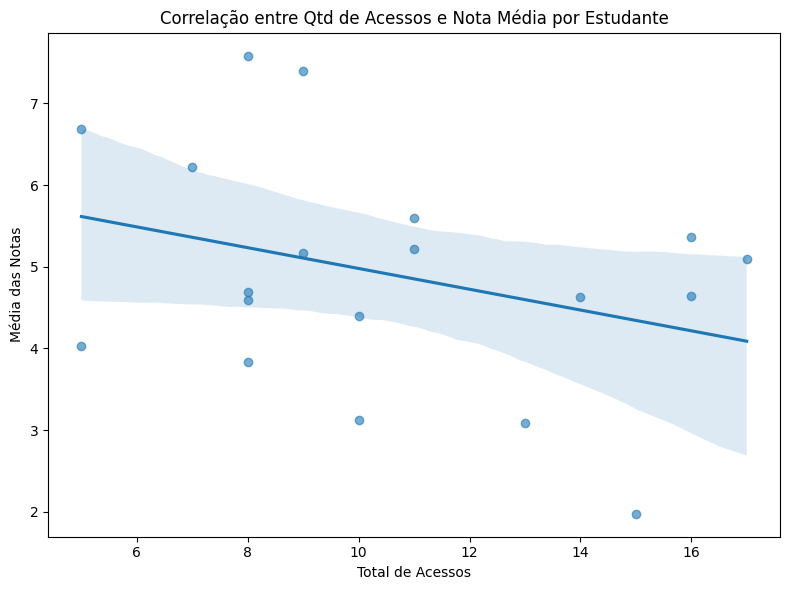

In [70]:
# Agrupar por estudante: total de acessos e média das notas
acessos_e_notas = df.groupby('Estudante').agg({
    'Feature': 'count',    # total de acessos
    'Nota': 'mean'         # média das notas
}).rename(columns={'Feature': 'Total Acessos', 'Nota': 'Média Nota'})

# Visualizar correlação
correlacao = acessos_e_notas.corr().loc['Total Acessos', 'Média Nota']
print(f"Correlação entre total de acessos e média de notas: {correlacao:.3f}")

# Visualizar a relação com scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(data=acessos_e_notas, x='Total Acessos', y='Média Nota', scatter_kws={"alpha":0.6})
plt.title('Correlação entre Qtd de Acessos e Nota Média por Estudante')
plt.xlabel('Total de Acessos')
plt.ylabel('Média das Notas')
plt.tight_layout()
plt.show()


O gráfico de regressão linear mostra que existe uma tendência de queda da nota conforme o aumento do número de acessos.

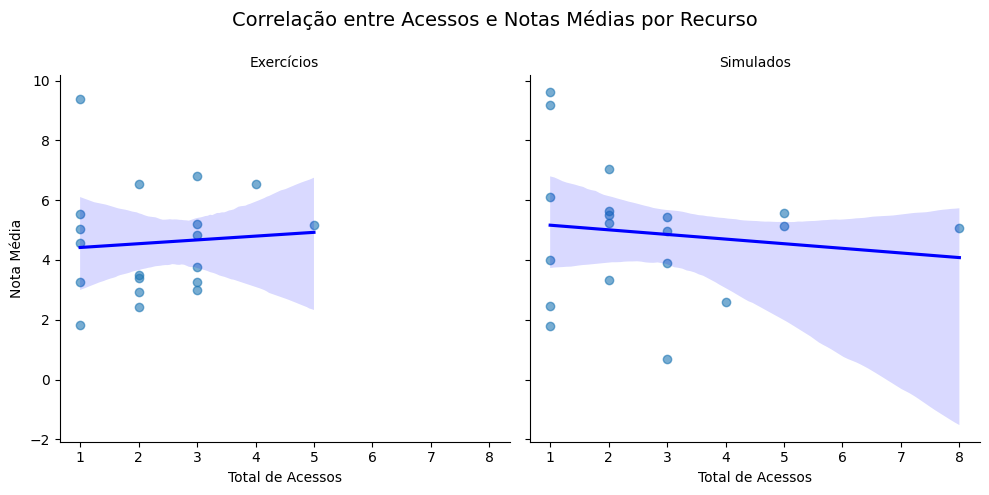

In [60]:
# Filtrar apenas os recursos "Simulados" e "Exercícios"
df_filtrado = df[df['Feature'].isin(['Simulados', 'Exercícios'])]

# Agrupar por estudante e recurso para contar acessos e calcular média de notas
df_acessos_notas = (
    df_filtrado.groupby(['Estudante', 'Feature'])
    .agg(acessos=('ID', 'count'), media_nota=('Nota', 'mean'))
    .reset_index()
)

# Criar os gráficos separados para cada recurso
g = sns.lmplot(
    data=df_acessos_notas,
    x='acessos',
    y='media_nota',
    col='Feature',         # cria um gráfico para cada recurso
    height=5,
    aspect=1,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'blue'},
)

g.set_axis_labels("Total de Acessos", "Nota Média")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85)
plt.suptitle("Correlação entre Acessos e Notas Médias por Recurso", fontsize=14)

plt.show()


Já quando separamos Simulados e Exercícios, o gráfico de regressão linear mostra discrepância no aproveitamento.

In [58]:
# Agrupar por recurso (Feature) para calcular total de acessos e nota média
tabela_recursos = (
    df.groupby('Feature')
    .agg(
        total_acessos=('ID', 'count'),
        nota_media=('Nota', 'mean')
    )
    .sort_values(by='total_acessos', ascending=False)
    .reset_index()
)

# Exibir a tabela inteira
display(tabela_recursos)


,Feature,total_acessos,nota_media
0,Aulas Online,60,NaN
1,Simulados,50,4.72
2,Ebooks,47,NaN
3,Exercícios,43,4.65


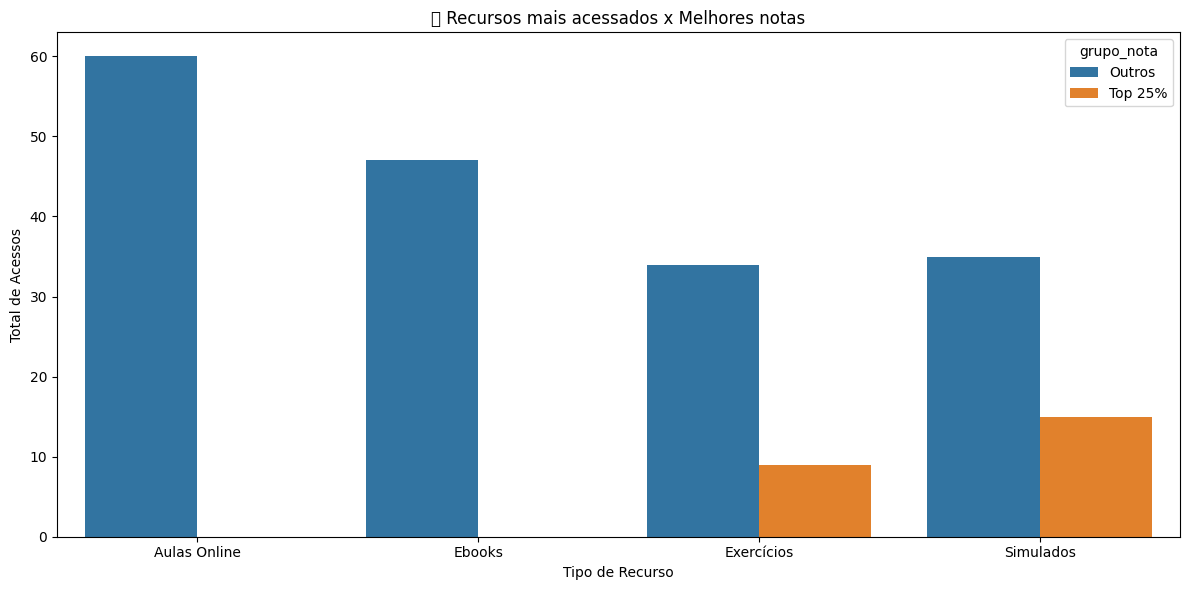

In [69]:
# Converter a coluna 'Nota' para numérico (caso ainda não esteja)
df['Nota'] = pd.to_numeric(df['Nota'], errors='coerce')

# Calcular o percentil 75
nota_p75 = df['Nota'].quantile(0.75)

# Criar a coluna 'grupo_nota'
df['grupo_nota'] = df['Nota'].apply(lambda x: 'Top 25%' if x >= nota_p75 else 'Outros')

# Agrupar por grupo e tipo de recurso
recursos_por_grupo = df.groupby(['grupo_nota', 'Feature'])['ID'].count().reset_index()
recursos_por_grupo.rename(columns={'ID': 'total_acessos'}, inplace=True)

# Plotar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=recursos_por_grupo, x='Feature', y='total_acessos', hue='grupo_nota')
plt.title('📚 Recursos mais acessados x Melhores notas')
plt.ylabel('Total de Acessos')
plt.xlabel('Tipo de Recurso')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


O gráfico mostra que os alunos com as melhores notas acessam somente exercícios e simulados.

Top regiões com notas baixas e muitos acessos:


,Região,media_nota,total_acessos
4,Sul,3.15,42
1,Nordeste,4.28,34
0,Centro Oeste,4.99,29
2,Norte,5.02,49
3,Sudeste,5.69,46


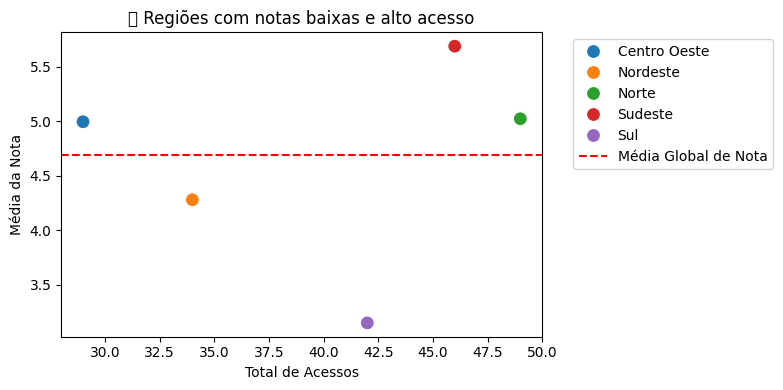

In [66]:
# Agrupando por Região
regiao_stats = df.groupby('Região').agg(
    media_nota=('Nota', 'mean'),
    total_acessos=('ID', 'count')
).reset_index()

# Ordenar pela média da nota ascendente e total de acessos descendente
regiao_stats_sorted = regiao_stats.sort_values(by=['media_nota', 'total_acessos'], ascending=[True, False])

# Exibir o top 10 das regiões com menor nota e maior acesso
print("Top regiões com notas baixas e muitos acessos:")
display(regiao_stats_sorted.head(10))

# Plotando
plt.figure(figsize=(8, 4))
sns.scatterplot(data=regiao_stats, x='total_acessos', y='media_nota', hue='Região', s=100)
plt.title('📍 Regiões com notas baixas e alto acesso')
plt.xlabel('Total de Acessos')
plt.ylabel('Média da Nota')
plt.axhline(df['Nota'].mean(), color='red', linestyle='--', label='Média Global de Nota')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


1. A Região Sul, apesar de uma média de acessos altos, tem obtido notas fracas o que pode indicar dificuldades pedagógicas no aproveitamento dos recursos.

2. O Centro Oeste apesar de apresentar notas boas, não tem um bom engajamento nos recursos o que pode demandar uma campanha para promover a utilização dos recursos o a melhoria das condiçoes de acesso as ferramentas.

